1) Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# %matplotlib inline


In [ ]:
import numpy as np

def simple_kmeans(X, n_clusters, n_iters=100, random_state=42):
    """
    Very simple K-Means implementation using NumPy only.
    X: (n_samples, n_features) array
    Returns:
        labels: cluster index for each sample
        centers: cluster centers
    """
    rng = np.random.RandomState(random_state)
    n_samples = X.shape[0]

    # 1) Initialize centroids by picking random points
    centers = X[rng.choice(n_samples, n_clusters, replace=False)]

    for it in range(n_iters):
        # 2) Assign each point to nearest centroid
        #    distances: (n_samples, n_clusters)
        distances = ((X[:, None, :] - centers[None, :, :]) ** 2).sum(axis=2)
        labels = distances.argmin(axis=1)

        # 3) Recompute centroids
        new_centers = np.zeros_like(centers)
        for k in range(n_clusters):
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                new_centers[k] = cluster_points.mean(axis=0)
            else:
                # if a cluster is empty, reinitialize it randomly
                new_centers[k] = X[rng.randint(0, n_samples)]

        # 4) Check convergence
        if np.allclose(new_centers, centers):
            break
        centers = new_centers

    return labels, centers


In [ ]:
k_amazon = 5
amazon_labels, amazon_centers = simple_kmeans(X_mall_scaled, n_clusters=k_amazon, n_iters=100, random_state=42)


k_amazon = 4
amazon_labels, amazon_centers = simple_kmeans(
    X_amazon_scaled,
    n_clusters=k_amazon,
    n_iters=100,
    random_state=42
)



NameError: name 'simple_kmeans' is not defined

Silhouette (original space): 0.41664341513732767


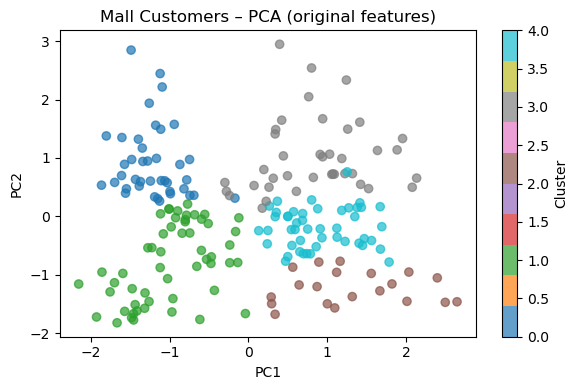

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

print("Silhouette (original space):",
      silhouette_score(X_mall_scaled, amazon_labels))

pca = PCA(n_components=2)
X_mall_pca = pca.fit_transform(X_mall_scaled)

plt.figure(figsize=(6,4))
plt.scatter(X_mall_pca[:,0], X_mall_pca[:,1],
            c=amazon_labels, cmap='tab10', alpha=0.7)
plt.colorbar(label="Cluster")
plt.title("Mall Customers – PCA (original features)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.tight_layout()
plt.show()


✅ Step 3 – LDA “contrastive”

Silhouette (LDA space, same labels): 0.34166891089647583


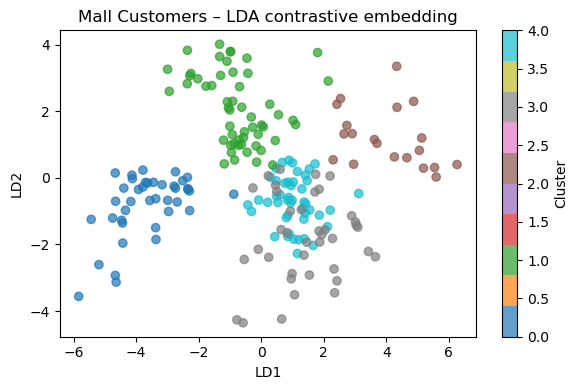

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda_mall = LDA(n_components=2)
X_mall_lda = lda_mall.fit_transform(X_mall_scaled, amazon_labels)

print("Silhouette (LDA space, same labels):",
      silhouette_score(X_mall_lda, amazon_labels))

plt.figure(figsize=(6,4))
plt.scatter(X_mall_lda[:,0], X_mall_lda[:,1],
            c=amazon_labels, cmap='tab10', alpha=0.7)
plt.colorbar(label="Cluster")
plt.title("Mall Customers – LDA contrastive embedding")
plt.xlabel("LD1"); plt.ylabel("LD2")
plt.tight_layout()
plt.show()


also want to re-run K-Means on the LDA space, again

Silhouette (K-Means on LDA embedding): 0.4388586301906783


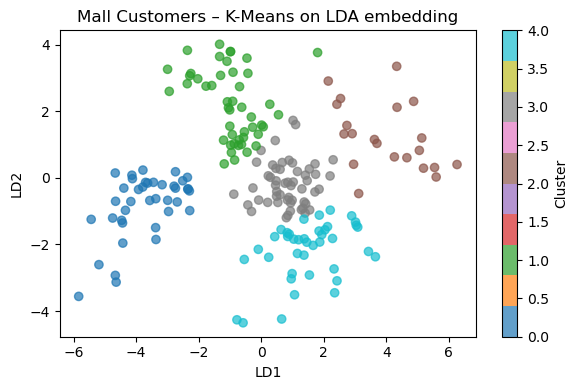

In [ ]:
amazon_labels_lda, _ = simple_kmeans(X_mall_lda, n_clusters=k_amazon, n_iters=100, random_state=42)

print("Silhouette (K-Means on LDA embedding):",
      silhouette_score(X_mall_lda, amazon_labels_lda))

plt.figure(figsize=(6,4))
plt.scatter(X_mall_lda[:,0], X_mall_lda[:,1],
            c=amazon_labels_lda, cmap='tab10', alpha=0.7)
plt.colorbar(label="Cluster")
plt.title("Mall Customers – K-Means on LDA embedding")
plt.xlabel("LD1"); plt.ylabel("LD2")
plt.tight_layout()
plt.show()


In [7]:
import sklearn, numpy
print("sklearn:", sklearn.__version__)
print("numpy:", numpy.__version__)


sklearn: 1.3.0
numpy: 1.26.2
